In [450]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

#Data Retrieving
import yfinance as yf
from bcb import sgs 

In [451]:
#Functions
def datetime_format(date_str_col:str, date_format:str=None) -> datetime:
    """
    Streamlines datetime column conversion for data manipulation. 

    :param date_str_col: pandas.DataFrame date string-formated column
    :param date_format: date pattern to change
    """
    try:
        if (date_str_col is None
            or ~isinstance(date_str_col, str)):
            return pd.to_datetime(date_str_col).dt.strftime(date_format)
        else: 
            raise ValueError("Wrong data type")
    except (TypeError, ValueError) as e: 
        raise ValueError(f"An error has ocurred: {e}")
    
def set_fig_context(ncols=1, figsize=(8,8)):
    """
    Streamlines figure context setting.

    :param ncols: number ax columns to be shown. Standard = 1
    :param figsize: figure size. Standard = (8,8)
    """
    fig, axes = plt.subplots(axes=any, ncols=ncols, figsize=figsize)
    sns.set_context('paper')
    sns.set_style('whitegrid')

    plt.tight_layout()
    plt.show()
    return fig, axes

def format_numbers(num: int | float):
    """
    Format large numbers into more readable formats.

    :param num: input number [int | float]
    """
    try:
        if  7 <= len(str(num)) < 9:
            return '{:.1f}M'.format(num/1e6)
        elif len(str(num)) >= 9 :
            return '{:.1f}B'.format(num/1e9)
        else:
            raise ValueError("Number should have a length of at least 7 characters.")
    except (TypeError, ValueError) as e:
        raise ValueError(f"An error has ocurred. Check your input: {e}")

In [452]:
#Params
#Tickers
tickers = ["STNE", "PAGS", "CIEL3.SA"]

#Dates
start_date = dt.datetime.now().date() - timedelta(365*5)
base_date = start_date.strftime('%Y-%m-%d')

In [491]:
stne, pags, ciel3 = [],[],[]

for ticker in tickers:
    res = yf.download(ticker, start=start_date)
    
    if ticker == "STNE":
        stne.append(res)
        stne = pd.concat(stne, axis=0).reset_index()
    elif ticker == "PAGS":
        pags.append(res)
        pags = pd.concat(pags, axis=0).reset_index()
    elif ticker == "CIEL3.SA":
        ciel3.append(res)
        ciel3 = pd.concat(ciel3, axis=0).reset_index()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [454]:
stne.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

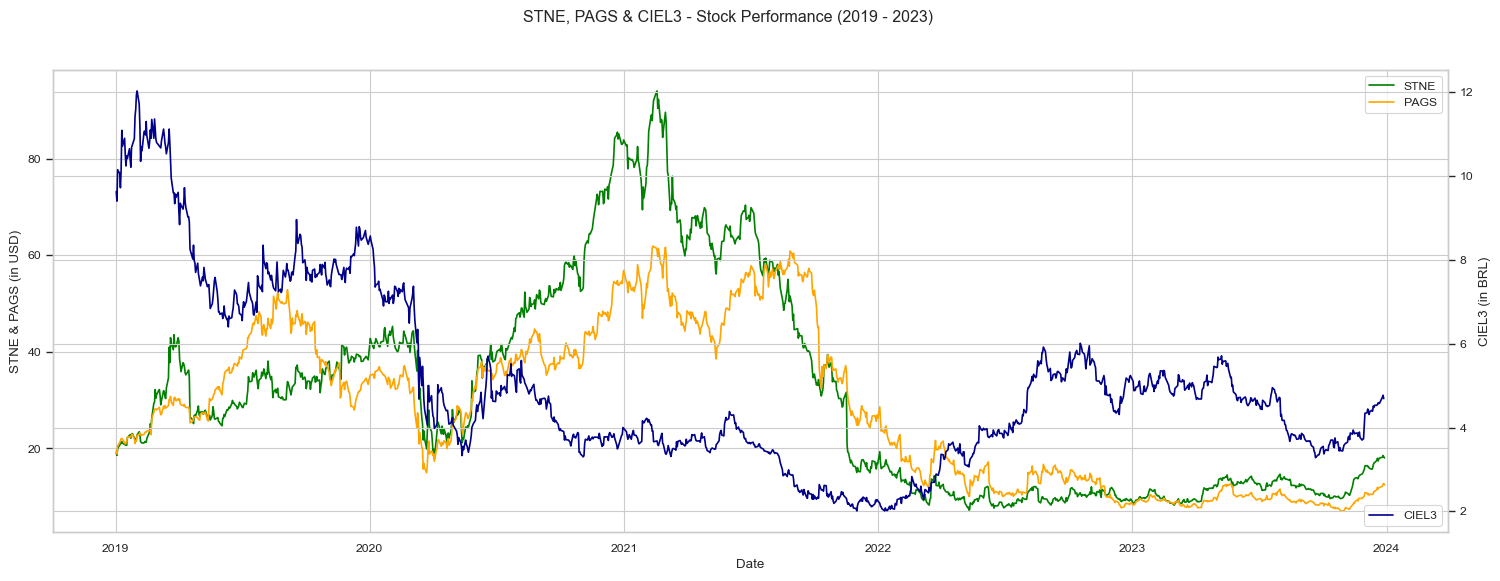

In [466]:
fig, ax = plt.subplots(figsize=(18,6), sharex=True)

sns.lineplot(data=stne, x='Date', y='Close', color='green', ax=ax, label='STNE')
sns.lineplot(data=pags, x='Date', y='Close', color='orange', ax=ax, label='PAGS')
ax.set_ylabel('STNE & PAGS (in USD)')

fig.suptitle("STNE, PAGS & CIEL3 - Stock Performance (2019 - 2023)")

ax1 = ax.twinx()
sns.lineplot(data=ciel3, x='Date', y='Close', color='darkblue', ax=ax1, label='CIEL3')
ax1.set_ylabel('CIEL3 (in BRL)')

ax.legend(loc='upper right')
ax1.legend(loc='lower right')

plt.show()

In [496]:
macro_data = sgs.get({'selic':432, 'ipca':433}, start=start_date).reset_index().rename(columns=str.upper)

macro_data.head()

,DATE,SELIC,IPCA
0,2019-01-01,6.5,0.32
1,2019-01-02,6.5,NaN
2,2019-01-03,6.5,NaN
3,2019-01-04,6.5,NaN
4,2019-01-05,6.5,NaN


In [499]:
macro_data['IPCA'].dropna()

0       0.32
31      0.43
59      0.75
90      0.57
120     0.13
151     0.01
181     0.19
212     0.11
243    -0.04
273     0.10
304     0.51
334     1.15
365     0.21
396     0.25
425     0.07
456    -0.31
486    -0.38
517     0.26
547     0.36
578     0.24
609     0.64
639     0.86
670     0.89
700     1.35
731     0.25
762     0.86
790     0.93
821     0.31
851     0.83
882     0.53
912     0.96
943     0.87
974     1.16
1004    1.25
1035    0.95
1065    0.73
1096    0.54
1127    1.01
1155    1.62
1186    1.06
1216    0.47
1247    0.67
1277   -0.68
1308   -0.36
1339   -0.29
1369    0.59
1400    0.41
1430    0.62
1461    0.53
1492    0.84
1520    0.71
1551    0.61
1581    0.23
1612   -0.08
1642    0.12
1673    0.23
1704    0.26
1734    0.24
1765    0.28
Name: IPCA, dtype: float64